# Train Validation Visualization

This notebook takes a .csv file from a DDNN train log. The .csv file is loaded into pandas dataframe and visualized using seaborn and matplotlib  

## The setup

This setup has 5 MobileNetV2 device models pretrained on ImageNet and a ResNet152 edge model not pretrained. The device models feature extraction base are forzen, hence only the classifier is trained. All layers of the edge model is trained.

## Conclusion

Even with heavy image augmentation the Pascal VOC is too sparse a data set to properly train the ResNet edge model, that clearly overfits to the training data. 

Next, (1) pretrained imagenet weight for edge model, (2) even heavier augmentation, (3) training on a dense dataset e.g. imagenet first. 

In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [4]:
df = pd.read_csv('../DDNN/logging/branchy_20190926-135000.csv', index_col=0)
df.head()

,exit-0-train-loss,exit-1-train-loss,exit-2-train-loss,exit-3-train-loss,exit-0-train-accuracy,exit-1-train-accuracy,exit-2-train-accuracy,exit-3-train-accuracy,exit-0-train-time,exit-1-train-time,...,exit-2-test-loss,exit-3-test-loss,exit-0-test-accuracy,exit-1-test-accuracy,exit-2-test-accuracy,exit-3-test-accuracy,exit-0-test-time,exit-1-test-time,exit-2-test-time,exit-3-test-time
0,2.262439,2.258425,2.234505,0.333326,0.166721,0.202145,0.353916,0.903884,0.000000,0.000000,...,2.112803,0.061425,0.280,0.350,0.580,0.974,3.023148,3.023148,18.680096,18.680096
1,2.177287,2.129718,1.812276,0.216946,0.251625,0.322392,0.528924,0.932889,0.000000,0.000000,...,1.230804,0.101017,0.300,0.346,0.610,0.964,3.988743,8.975983,16.954184,20.948410
2,2.089243,1.935496,1.158447,0.215282,0.279981,0.359279,0.668427,0.929964,0.000000,15.621901,...,0.741983,0.110218,0.348,0.380,0.828,0.976,3.989220,8.975983,15.957594,19.947290
3,1.990085,1.745026,0.784198,0.186223,0.320198,0.416640,0.784612,0.940933,15.654087,15.654087,...,0.515813,0.112062,0.372,0.452,0.872,0.966,7.335186,16.310692,24.289608,29.275894
4,1.895256,1.593381,0.591934,0.172422,0.350422,0.458645,0.839942,0.942964,0.000000,15.652895,...,0.388610,0.138403,0.368,0.518,0.904,0.958,6.302357,13.253927,20.234823,25.222540


In [5]:
#palette = sns.color_palette("mako_r", 6)
legend = [
    'exit-0', 
    'exit-1', 
    'exit-2',
    'exit-3'
]
train_loss = [
    df['exit-0-train-loss'], 
    df['exit-1-train-loss'],
    df['exit-2-train-loss'],
    df['exit-3-train-loss']
]
train_acc = [
    df['exit-0-train-accuracy'], 
    df['exit-1-train-accuracy'],
    df['exit-2-train-accuracy'],
    df['exit-3-train-accuracy']
]
test_loss = [
    df['exit-0-test-loss'], 
    df['exit-1-test-loss'],
    df['exit-2-test-loss'],
    df['exit-3-test-loss']
]
test_acc = [
    df['exit-0-test-accuracy'], 
    df['exit-1-test-accuracy'],
    df['exit-2-test-accuracy'],
    df['exit-3-test-accuracy']
]
train_time = [
    df['exit-0-train-time'], 
    df['exit-1-train-time'],
    df['exit-2-train-time'],
    df['exit-3-train-time']
]
test_time = [
    df['exit-0-test-time'], 
    df['exit-1-test-time'],
    df['exit-2-test-time'],
    df['exit-3-test-time']
]

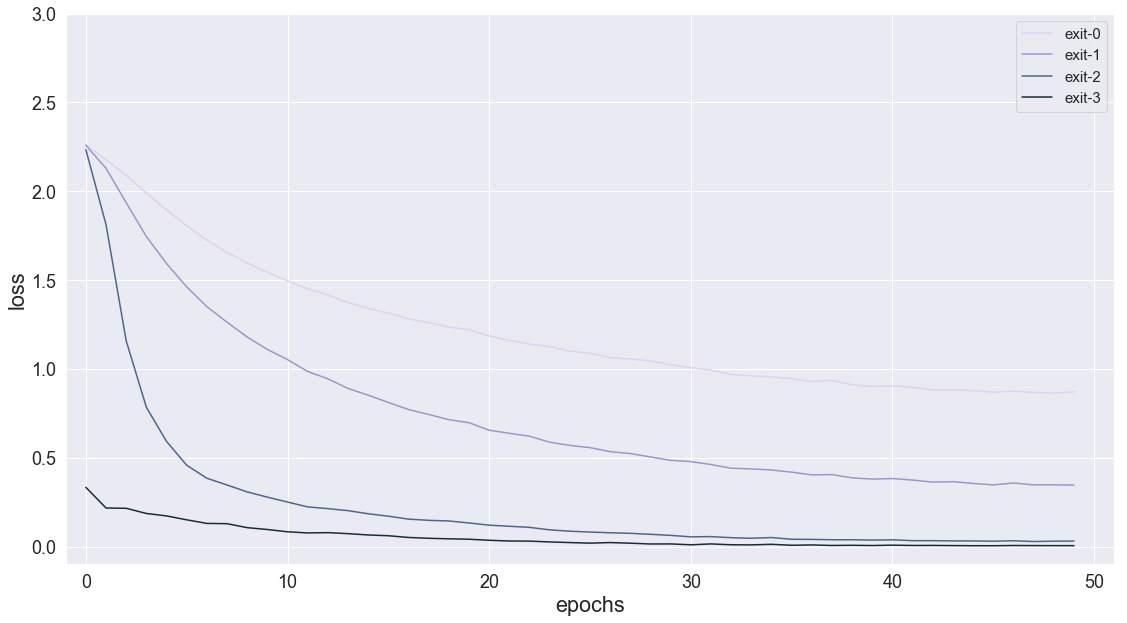

In [43]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=train_loss,
                  palette="ch:2.5,.25", 
                  dashes=False)


#ax.set(xlabel='epochs', ylabel='loss')
plt.xlabel('epochs', fontsize='large')
plt.ylabel('loss', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small')
plt.xlim([-1, 51])
plt.ylim([-0.1, 3])
plt.tight_layout()
plt.savefig('BResNet_train_loss_miniimagenet10.png')
plt.show()

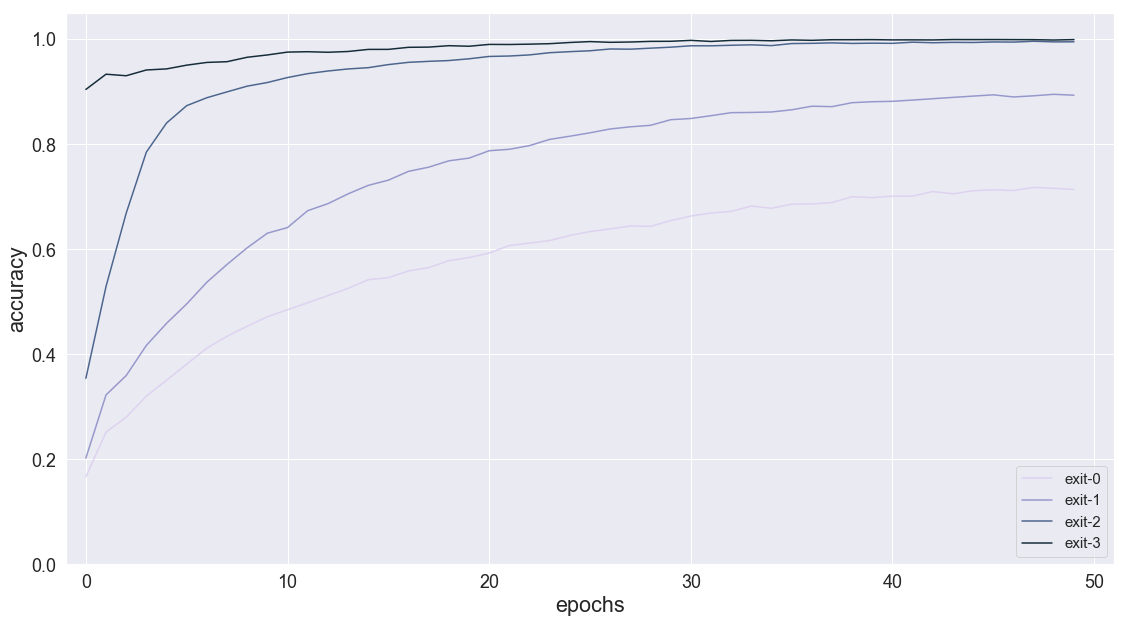

In [42]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=train_acc,
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('accuracy', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small', loc='lower right')
plt.xlim([-1, 51])
plt.ylim([0, 1.05])
#plt.title('Train accuracy')
plt.tight_layout()
plt.savefig('BResNet_train_acc_miniimagenet10.png')
plt.show()

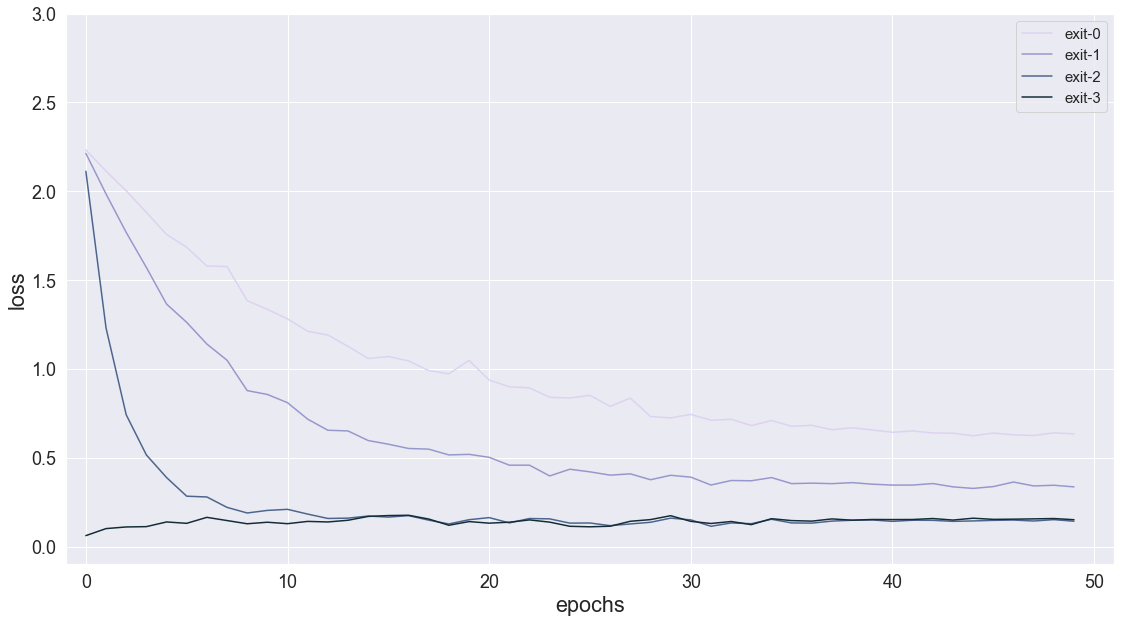

In [41]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=test_loss, 
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('loss', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small')
plt.xlim([-1, 51])
plt.ylim([-0.1, 3])
#plt.title('Test loss')
plt.tight_layout()
plt.savefig('BResNet_test_loss_miniimagenet10.png')
plt.show()

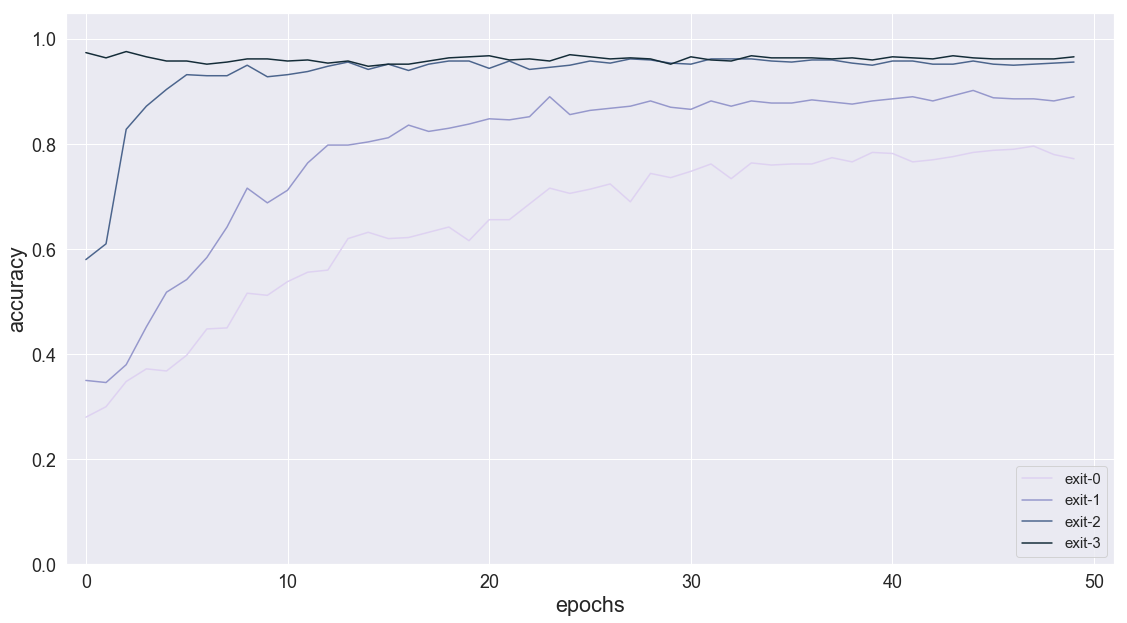

In [40]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=test_acc, 
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('accuracy', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small', loc='lower right')
plt.xlim([-1, 51])
plt.ylim([0, 1.05])
#plt.title('Test accuracy')
plt.tight_layout()
plt.savefig('BResNet_test_acc_miniimagenet10.png')
plt.show()

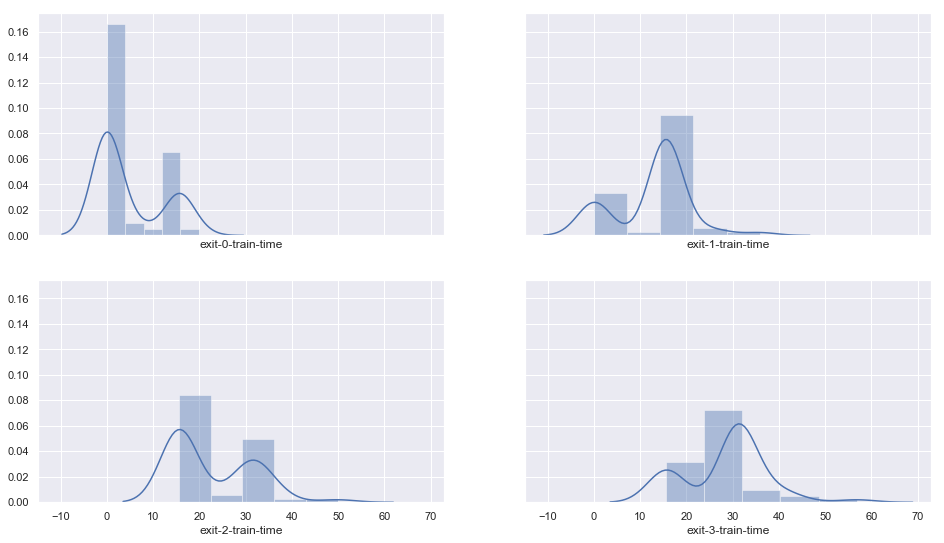

In [15]:
fig, axes = plt.subplots(2,2, figsize=(16,9),     sharex='all',
    sharey='all')
kwargs =  {'kde':True, 'hist': True, 'bins':5}
sns.distplot(train_time[0], ax=axes[0][0], **kwargs)
sns.distplot(train_time[1], ax=axes[0][1], **kwargs)
sns.distplot(train_time[2], ax=axes[1][0], **kwargs)
sns.distplot(train_time[3], ax=axes[1][1], **kwargs)
#sns.distplot(train_time[1])
#ax1 = sns.lineplot(test_time)
#ax.set(xlabel='epochs', ylabel='loss')
#plt.legend(legend)
plt.show()

In [17]:
train_time[0]

0      0.000000
1      0.000000
2      0.000000
3     15.654087
4      0.000000
5      0.000000
6     15.621424
7      0.000000
8      0.000000
9      7.978678
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     5.984545
17    15.652418
18     0.000000
19     0.000000
20    15.622139
21    15.621185
22     0.000000
23     2.075911
24    15.621901
25     0.000000
26     0.000000
27     0.000000
28    15.620232
29    15.621662
30     0.000000
31     0.000000
32     0.000000
33     0.000000
34     0.000000
35     5.984068
36    15.590191
37    15.589952
38    15.589476
39     0.000000
40     0.000000
41     0.000000
42    15.620470
43     0.000000
44    19.856215
45     0.000000
46     0.000000
47     0.000000
48    15.621901
49     0.000000
Name: exit-0-train-time, dtype: float64